In [1]:
%matplotlib inline

# Data Preparation

### Load CSV using Pandas

In [1]:
import pandas as pd
train = pd.read_csv('../data/kaggle/train.csv')
test = pd.read_csv('../data/kaggle/test.csv')
print(train.shape, test.shape)

(990, 194) (594, 193)


### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(train.species)
labels = encoder.classes_

### Reshape the data

In [3]:
X_train = train.drop(['species'], axis=1).set_index('id', drop=True)
X_train.index.name = None
X_test = test.set_index('id', drop=True)
X_test.index.name = None

### Standard Scaler (regularization)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transform_values = lambda df, func: pd.DataFrame(
    func(df.values), 
    columns=df.columns, 
    index=df.index)
X_train_scaled = transform_values(X_train, scaler.fit_transform)
X_test_scaled = transform_values(X_test, scaler.transform)
# X_train_scaled = X_train
# X_test_scaled = X_test

### Peek the data

In [5]:
cols = ['margin1', 'texture1', 'shape1'] # X_train.columns
train_rows = range(0,4) # range(X_train.shape[0])
test_rows = range(0,4)  # range(X_test.shape[0])
the_merge = lambda a, b, rows: pd.merge(
    a[cols].iloc[rows],
    b[cols].iloc[rows],
    left_index=True,
    right_index=True,
    suffixes=['','_scaled'])

pd.concat([the_merge(X_train, X_train_scaled, train_rows),
           the_merge(X_test,  X_test_scaled, test_rows )],
          keys=['train', 'test'])
           

margin1  texture1    shape1  margin1_scaled  texture1_scaled  \
train 1   0.007812  0.049805  0.000647       -0.486611         0.632907   
      2   0.005859  0.000000  0.000749       -0.585602        -0.498496   
      3   0.005859  0.003906  0.000973       -0.585602        -0.409765   
      5   0.000000  0.023438  0.000453       -0.882575         0.033937   
test  4   0.019531  0.112310  0.000782        0.107387         2.052813   
      7   0.007812  0.057617  0.000534       -0.486611         0.810370   
      9   0.000000  0.013672  0.000712       -0.882575        -0.187914   
      12  0.000000  0.002930  0.000556       -0.882575        -0.431937   

          shape1_scaled  
train 1       -0.340305  
      2        0.037105  
      3        0.859058  
      5       -1.051655  
test  4        0.158548  
      7       -0.756223  
      9       -0.099771  
      12      -0.672555

### Plotting the data

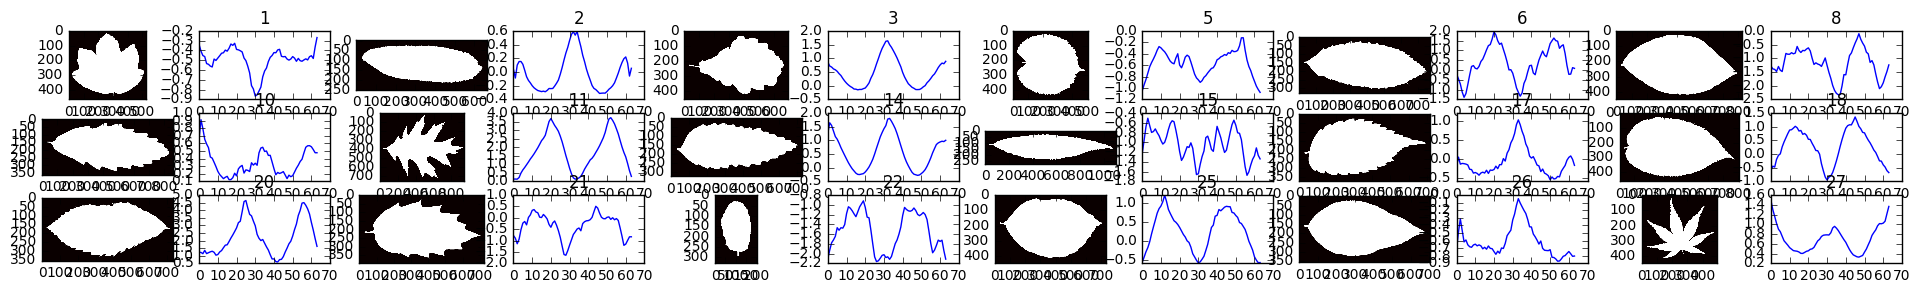

In [6]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = (24, 3)
shapes = X_train_scaled.filter(like='shape')
r = 3
c = 6
for i in range(r * c):
    id = shapes.index[i]
    img = mpimg.imread('../data/images/%s.jpg' % id)
    plt.subplot(r, c*2, 2*i + 1)
    plt.imshow(img, cmap='hot')
    plt.subplot(r, c*2, 2*i + 2)
    plt.plot(shapes.values[i])
    plt.title(id)
plt.show()

# Model Selection

### List Classifiers

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    ('KNN', KNeighborsClassifier(3)),
    ('Linear SVM', SVC(kernel="linear", C=0.025, probability=True)),
    ('RBF SVM',    SVC(C=1, probability=True)),

    #('Nu SVM', NuSVC(probability=True)),
    #('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GradientBoost', GradientBoostingClassifier()),
    ('Neural Network', MLPClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis())]

### Split for Cross Validation

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss

# num_fold = 1
# cv_rate = 0.1
# sss = StratifiedShuffleSplit(num_fold, test_size=cv_rate, random_state=23)

# for train_index, test_index in sss.split(X_train_scaled, Y_train):
#     X, X_cv = X_train_scaled.values[train_index], X_train_scaled.values[test_index]
#     y, y_cv = y_train[train_index], y_train[test_index]

# Logging for Visual Comparison
#log_cols=["Classifier", "Accuracy", "Log Loss"]
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for name, clf in classifiers:
    it = 0
    print("="*30)
    print(name,)
    
    score = cross_val_score(clf, X_train_scaled, y_train).min()
    print("Accuracy Score: %.4f" % score)
        
#     clf.fit(X, y)
    
#     print('****Results****')
#     score = clf.score(X_cv, y_cv)*100
#     print("Accuracy Score: %.4f" % score)

#     y_pred_proba = clf.predict_proba(X_cv)
#     ll = log_loss(y_cv, y_pred_proba)
#     print("Log Loss:       %f" % ll)

    log_entry = pd.DataFrame([[name, score]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNN
Accuracy Score: 0.9529
Linear SVM
Accuracy Score: 0.9731
RBF SVM
Accuracy Score: 0.9663
Decision Tree
Accuracy Score: 0.6397
Random Forest
Accuracy Score: 0.8030
AdaBoost
Accuracy Score: 0.0337
GradientBoost
Accuracy Score: 0.5051
Neural Network
Accuracy Score: 0.9697
Naive Bayes
Accuracy Score: 0.4646
LDA
Accuracy Score: 0.9663
QDA
Accuracy Score: 0.0269


/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:457: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/leonmax/.virtualenvs/cs229/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are

In [9]:
log

,Classifier,Accuracy
0,KNN,0.952862
0,Linear SVM,0.973064
0,RBF SVM,0.966330
0,Decision Tree,0.639731
0,Random Forest,0.803030
0,AdaBoost,0.033670
0,GradientBoost,0.505051
0,Neural Network,0.969697
0,Naive Bayes,0.464646
0,LDA,0.966330


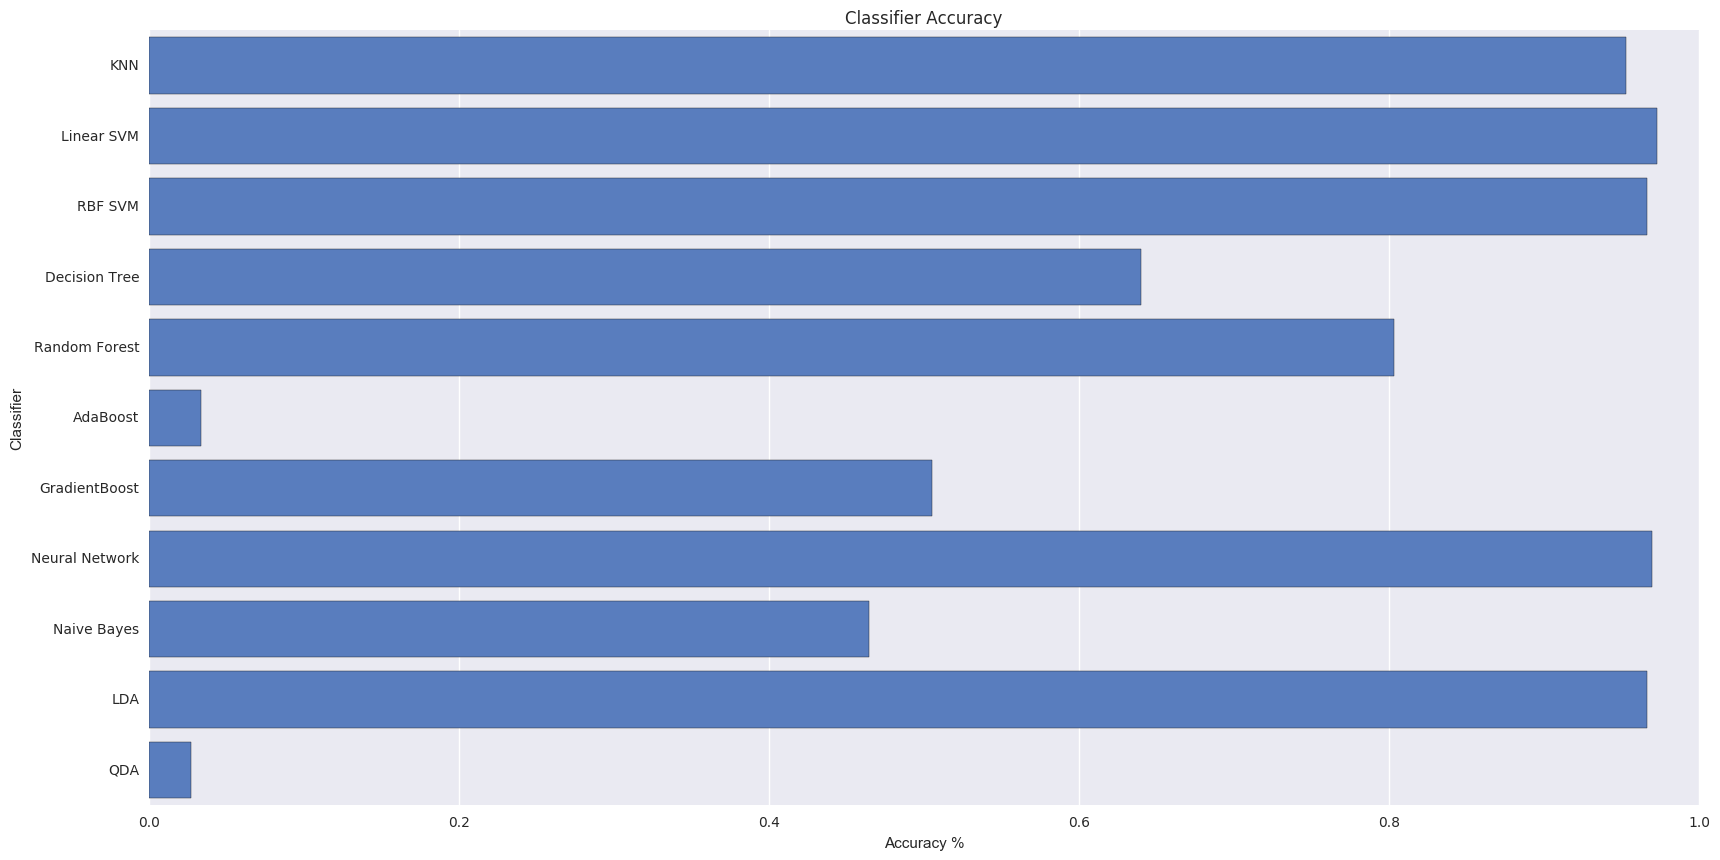

In [10]:
import seaborn as sns
rcParams['figure.figsize'] = (20, 10)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# sns.set_color_codes("muted")
# sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

# plt.xlabel('Log Loss')
# plt.title('Classifier Log Loss')
# plt.show()

# Submission

In [23]:
# Predict Test Set
favorite_clf = SVC(kernel="linear", C=0.025, probability=True)
favorite_clf.fit(X_train_scaled, y_train)
test_predictions = favorite_clf.predict_proba(X_test_scaled)

# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=labels)
submission.insert(0, 'id', X_test.index)
submission.reset_index()

# Export Submission
#submission.to_csv('submission.csv', index = False)
submission.tail()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
589,1576,0.019976,0.124953,0.007523,0.013921,0.014051,0.008699,0.005627,0.012649,0.035661,...,0.005947,0.004709,0.006169,0.007287,0.005838,0.016411,0.018853,0.005002,0.004203,0.028941
590,1577,0.019449,0.012011,0.004263,0.019247,0.003195,0.004252,0.005909,0.018939,0.036557,...,0.005585,0.004263,0.012952,0.007299,0.016751,0.030335,0.014367,0.004600,0.003362,0.023642
591,1579,0.015489,0.009813,0.004810,0.007602,0.004542,0.013476,0.003636,0.006853,0.008753,...,0.001708,0.003421,0.004996,0.006968,0.008681,0.003905,0.003168,0.005092,0.004268,0.016173
592,1580,0.006751,0.006475,0.017431,0.028824,0.003806,0.005049,0.012319,0.009850,0.007750,...,0.007556,0.016978,0.003237,0.014447,0.003037,0.014453,0.006042,0.016535,0.003068,0.007763
593,1583,0.004216,0.007288,0.013585,0.014502,0.003071,0.017929,0.010065,0.005244,0.006707,...,0.002753,0.005128,0.003086,0.006067,0.004362,0.008390,0.003658,0.009509,0.003930,0.010118
